# 2.1 Probability theory

[Link to section outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit#heading=h.7y6g7pe0alvl)


Concept map:
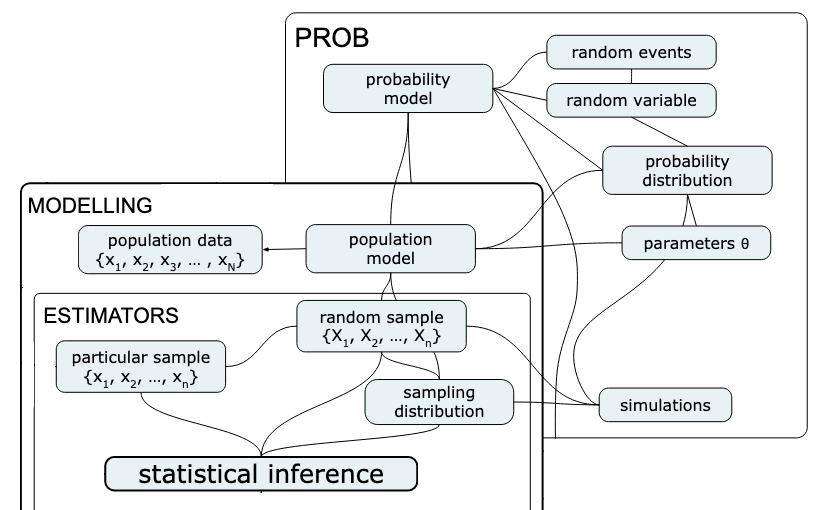

#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns

# set random seed for repeatability
np.random.seed(42)

# notebooks figs setup
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,5)})

%config InlineBackend.figure_format = 'retina'

# silence annoying warnings
import warnings; warnings.filterwarnings('ignore')

In [2]:
# probability distributions we'll use in examples
from scipy.stats.distributions import uniform
from scipy.stats.distributions import norm
from scipy.stats.distributions import randint


## Why learn probability theory?

- definition: **probability theory is a language for describing uncertainty, variability, and randomness**

- Originally the study of "randomness" and "expectations" started to quantify random events in gambling:
  - example 1: `flip_coin` (see below)
  - example 2: `roll_die` (see below)


- Later extended to as a general purpose tool to model any process that contains uncertainty:
  - random variables = described by probability distribution (CDF, pmf/pdf) modelled as a math function with parameters $\theta$
  - noise = can be modelled as a random variable
  - sampling = variations due to random selection of a subset from the population
  - beliefs = can be described as probability distributions


- Probability theory is an essential too for all of statistics

- Probability theory is also a foundational subject that used in physics, machine learning, biology, optimization, algorithms, etc. (side note: in terms of usefulness, I'd say probability theory is up there with linear algebra—you need to know this shit!)



## Random process examples using Python (bonus material)

Let's look at some simple examples of two random events: a coin flip and a die roll.
We'll use the Python module `random` to generate random numbers.

In [3]:
import random

random.random() # random number between 0 (inclusive) and 1 (non-inclusive)

0.009361848795279237

### Coin flip example

The code example below shows a function that performs the equivalent of a coin flip.

In [4]:
def flip_coin():
    r = random.random()  # a number in the range [0,1)
    if r < 0.5:
        return "heads"
    else:
        return "tails"

flip_coin()

'tails'

#### Flipping a coin many times

Let's see what happens if we flip the coin many times.

In [5]:
flips = [flip_coin() for _ in range(0, 2000)]
heads = [flip for flip in flips if flip == "heads"]

len(heads)/len(flips)

0.509

heads    1018
tails     982
dtype: int64


<AxesSubplot:>

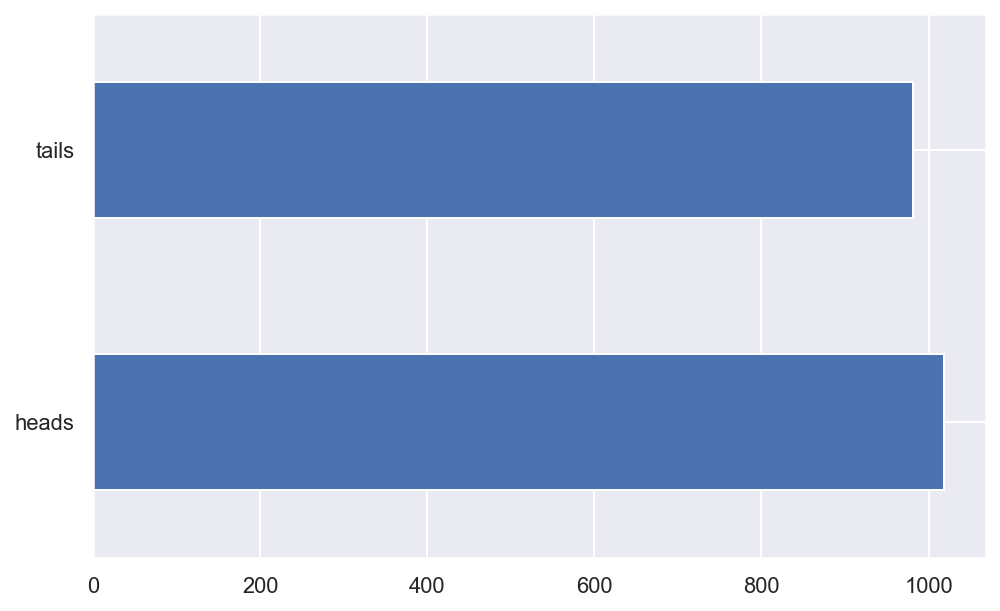

In [6]:
# plot a horizontal bar chart of the number of outcomes
s = pd.Series(flips)
print(s.value_counts().sort_index())
s.value_counts().sort_index().plot(kind="barh")

### Six-sided die example

In [7]:
def roll_die():
    r = random.random()*6  # a number in the range [0,6)
    rint = int(r)          # convert to integer in {0,1,2,3,4,5}
    value = rint + 1       # convert to integer in {1,2,3,4,5,6}
    return value

roll_die()

6

Let's see what happens if we roll the die many times.

1    1026
2     985
3     999
4    1052
5     944
6     994
dtype: int64


<AxesSubplot:>

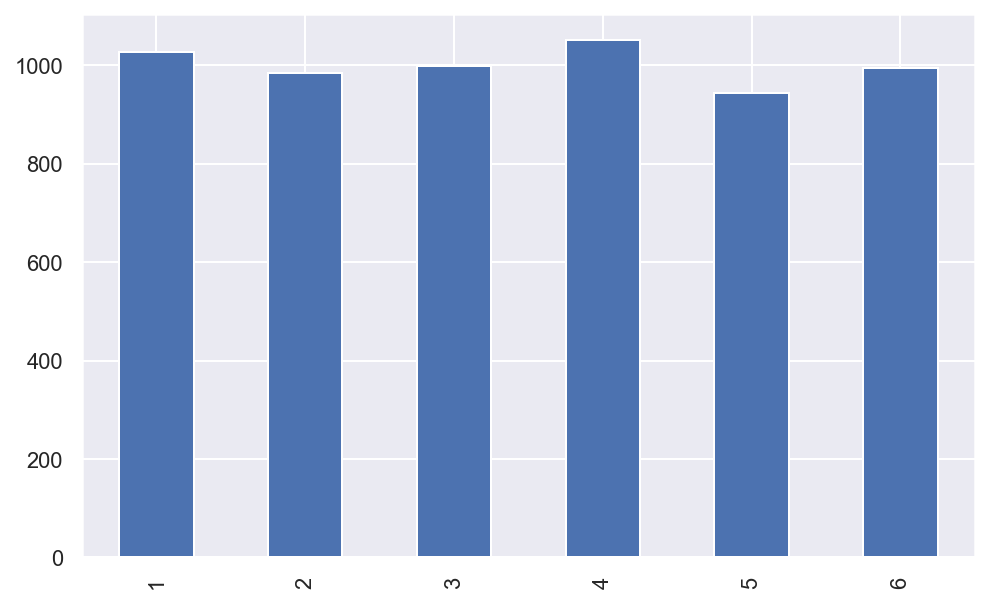

In [8]:
rolls = [roll_die() for _ in range(0, 6000)]
ds = pd.Series(rolls)
print(ds.value_counts().sort_index())
ds.value_counts().sort_index().plot(kind="bar")


### Why do we need probability theory in statistics?

Probability theory provides us with some essential tools needed for statistics:
  - modelling: describe a population as a probability distribution
  - sampling distributions: distributions obtained for random samples from a population
  - basically, there is "noise" and "uncertainty" in all the things, but if we can model
    the randomness, then it's very helpful...

Additionally, artificially introduced randomness is the basis for two of the most important statistics "kung fu" techniques:

- **random selection** = if you collect a sample of size n randomly selected from a population, then compute statistics from the sample, you can then make inferences about the whole population.
- **random assignment** = create two roughly equivalent groups by randomly assigning participants into group A or group B. This random split is the basis for a statistical experiment that compares an intervention group and a control group. Given the participants were randomly assigned to the two groups, we can hope they are roughly equally distributed on all dimensions (similar distribution of all confounding variables), so that any differences observed between groups can be attributed to the intervention. Calculating the difference statistic intervention-control give an estimate of the effect size of this intervention.

In the context of Amy's analysis of employee data:
- the split of new employees into NS and S groups is an example of random assignment
- the sample of 61 employees we're analyzing considered as representative of future employees


## Definitions

#### Example 1: Uniform distribution

In [9]:
rvU = uniform(0, 1)

from scipy import integrate
integrate.quad(rvU.pdf, 0, 0.5)[0]

0.5

#### Example 2: Normal distribution

In [10]:
rvN = norm(1000, 100)

from scipy import integrate
integrate.quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

#### Example 3: Coin flip

In [11]:
rvC = randint(0,2)

rvC.rvs(100)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

#### Example 4: Rolling a six-sided die

In [12]:
rvD = randint(1,7)

rvD.rvs(100)

array([2, 2, 4, 2, 2, 6, 4, 6, 6, 4, 1, 6, 5, 5, 2, 5, 2, 1, 4, 4, 4, 5,
       1, 5, 5, 1, 1, 1, 1, 4, 3, 3, 1, 3, 3, 1, 3, 5, 2, 2, 1, 4, 1, 4,
       2, 1, 6, 5, 3, 4, 6, 3, 3, 1, 3, 5, 6, 3, 1, 5, 2, 6, 3, 1, 2, 2,
       4, 5, 3, 1, 4, 5, 4, 6, 5, 5, 3, 5, 4, 5, 3, 3, 6, 4, 2, 2, 5, 6,
       1, 5, 6, 4, 4, 4, 4, 4, 6, 6, 3, 2])

## Calculus prerequisites

(see formulas and definitions in the book)

### Sets


In [13]:
S = {1, 2, 3}
T = {2, 5, 6}

S.intersection(T)

{2}

### Functions


In [14]:
def f(x):
    return 3*x

f(4)

12

<AxesSubplot:>

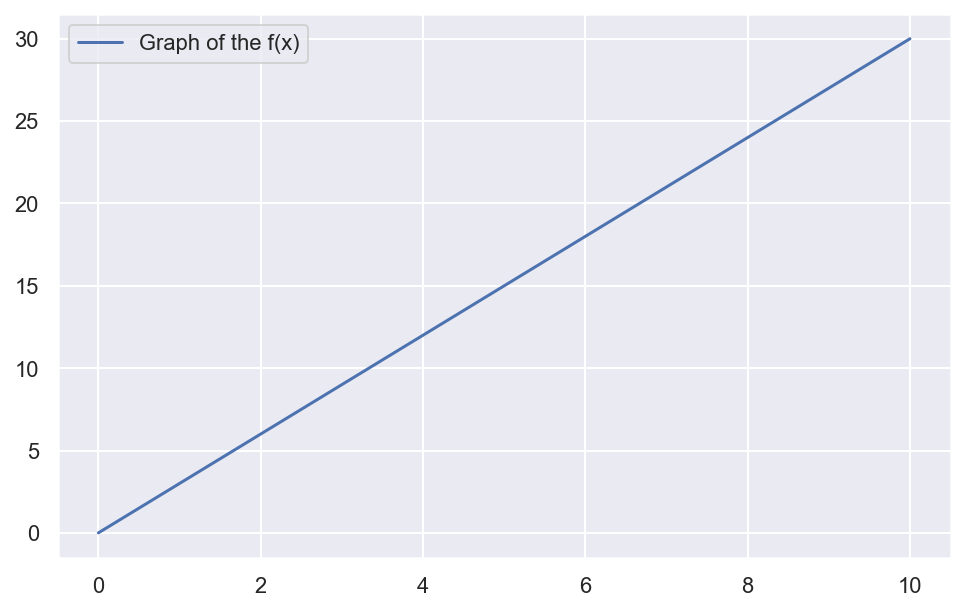

In [15]:
import numpy as np
import seaborn as sns

x = np.linspace(0, 10, 100)
fx = f(x)

sns.lineplot(x=x, y=fx, label="Graph of the f(x)")

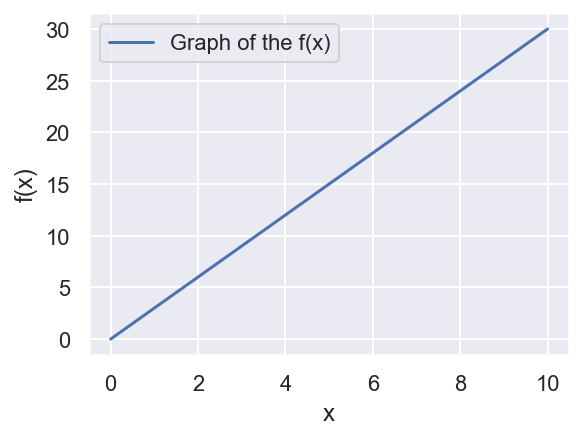

In [16]:
import matplotlib.pyplot as plt
filename = "figures/graph_of_function_f_3x.pdf"

with plt.rc_context({"figure.figsize":(4,3)}):
    ax = sns.lineplot(x=x, y=fx, label="Graph of the f(x)")
    ax.figure.tight_layout()
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [17]:
from math import log

log(4)

1.3862943611198906

<AxesSubplot:>

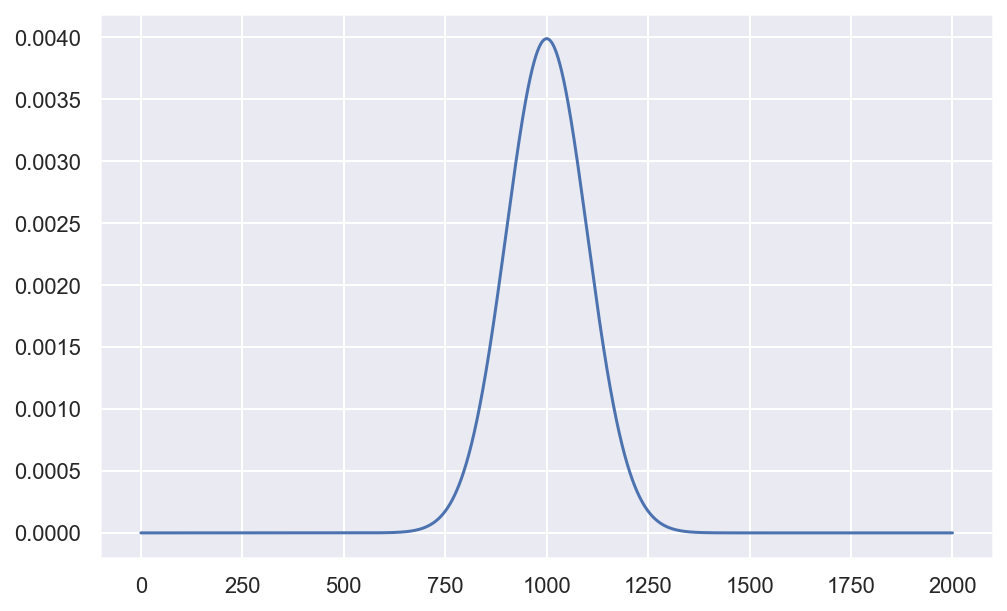

In [18]:
from scipy.stats.distributions import norm

rvN = norm(1000, 100)

x = np.linspace(0, 2000, 10000)
fN = rvN.pdf(x)
sns.lineplot(x=x, y=fN)

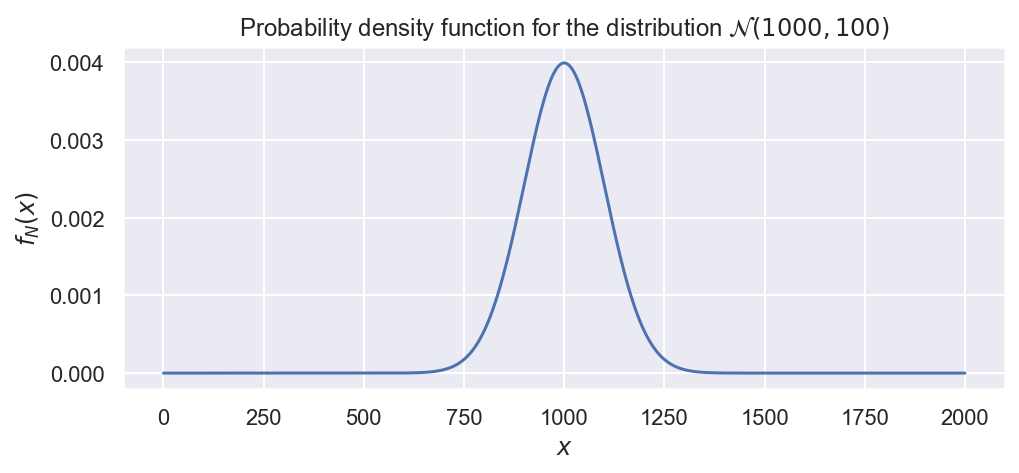

In [19]:
import matplotlib.pyplot as plt
filename = "figures/graph_of_pdf_of_rvN.pdf"

with plt.rc_context({"figure.figsize":(7,3)}):
    x = np.linspace(0, 2000, 10000)
    fN = rvN.pdf(x)
    ax = sns.lineplot(x=x, y=fN)
    ax.figure.tight_layout()
    ax.set_title("Probability density function for the distribution $\mathcal{N}(1000,100)$")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f_N(x)$')
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### Computing integrals geometrically

FIG 1: integral under $f(x)  = c $

FIG 2: integral under $g(x)  = mx$


### Computing integrals numerically using SciPy `integrate`

In [80]:
from scipy import integrate

In [83]:
# constant function y = c
c = 2
def f(x):
    return c

integrate.quad(f, 0, 5)[0]

10.0

In [84]:
# line y = mx
m = 3
def g(x):
    return m*x

integrate.quad(g, 0, 5)[0]

37.50000000000001

#### Uniform

In [109]:
from scipy.stats.distributions import uniform

rvU = uniform(0, 1)

integrate.quad(rvU.pdf, -10, 10)[0]

0.9999999999999999

In [105]:
integrate.quad(rvU.pdf, 0.2, 0.5)[0]

0.3

#### Normal

In [104]:
from scipy.stats.distributions import norm

rvN = norm(1000, 100)

integrate.quad(rvN.pdf, -10**4, 10**4)[0]

1.0

In [110]:
integrate.quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

$ $
---
$ $

### Computing integrals symbolically using SymPy

In [46]:
from sympy import symbols, integrate, Integral, simplify

In [ ]:
# define symbolic variables
x, a, b, c, m = symbols('x a b c m')

#### Constant function $f(x)=c$

In [116]:
fx = c
Integral(fx, x)

Integral(c, x)

In [75]:
# A_f(a,b) = 
integrate(fx, (x,a,b))

-a*c + b*c

In [72]:
# F_0(b) = 
integrate(fx, (x,0,b))

b*c

In [ ]:
`v

#### Line $g(x)=mx$

In [118]:
gx = m*x
Integral(gx, x)

Integral(m*x, x)

In [76]:
# A_g(a,b) = 
integrate(gx, (x,a,b))

-a**2*m/2 + b**2*m/2

In [77]:
# G_0(b) = 
integrate(gx, (x,0,b))

b**2*m/2

## Calculations with random variables

## Multiple random variables

## Probability models

In probability theory, we model data as instances of a **random variable** $X$ described by a **probability distribution** $p_X$ (a math function) with particular parameters (usually denoted with Greek letters like $\theta$, $\mu$, $\sigma$, etc.).

Multiple different ways to specify and interact with probability distributions:
- exact math model function (CDF from which we can extract pdf density function or pmf mass function). Math models allow us the most options: `rvs`, `cdf`, `pdf/pmf`, and stats like `mean`, `median`, `var/std`, `quartiles`.
- random draws form a generative process
- random draws from a real world process
- data for an entire population (census)
- sample data from a population
- synthetic data obtained by resampling
  - bootstrap estimation for any distribution
  - permutation test for no-difference-between-groups hypotheses

## Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $U(0,1)$ is described by the following probability density function:
$$ \Large
  p_X(x)=\begin{cases}
  1 & \mathrm{for}\ 0 \le x \le 1, \\
  0 & \mathrm{for}\ x<0\ \mathrm{or}\ x>1
  \end{cases}
$$
where $X$ is the name of the random variable and $x$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $X=x$.
For a uniform distribution $U(0,1)$, each $x$ between 0 and 1 is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [35]:
from scipy.stats.distributions import uniform

# create a uniform random variable U(0,1)
X = uniform(0, 1)
X

In [36]:
# draw 10 random samples from X
X.rvs(10)

array([1.22087955e-01, 3.56297838e-01, 9.06828442e-01, 2.72132249e-01,
       6.47690121e-01, 5.20376995e-04, 3.52568856e-01, 3.04781258e-01,
       1.64655853e-01, 5.34089419e-01])

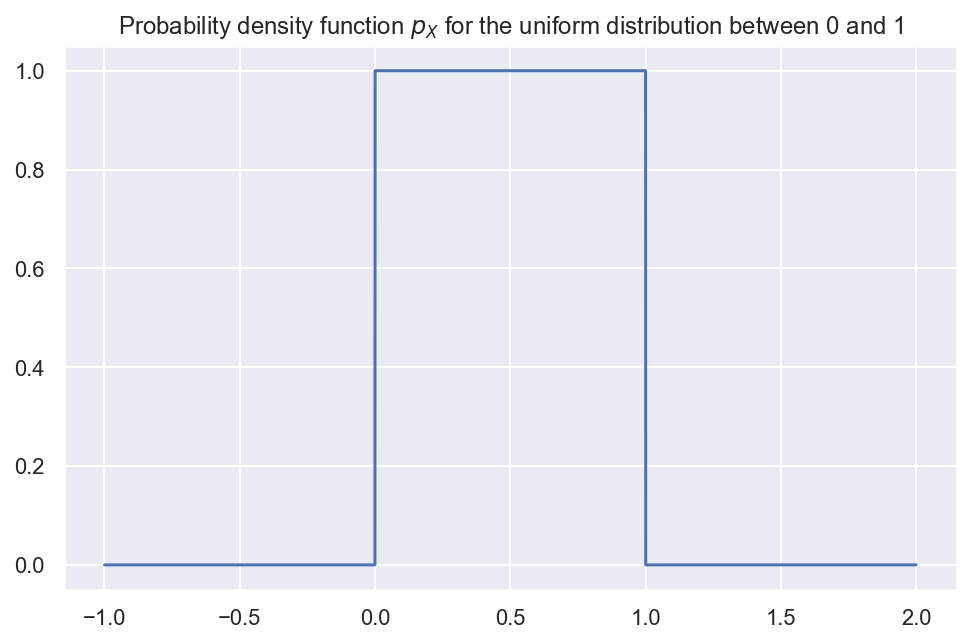

In [37]:
# plot the probability density function (pdf) of the random variable X
x = np.linspace(-1, 2, 10000)
pX = X.pdf(x)
_ = sns.lineplot(x, pX).set_title("Probability density function $p_X$ for the uniform distribution between 0 and 1")

## Normal probability distribution

A random variable $X$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is described by the probability density function:
$$ \Large
    p_X(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$
where the mean $\mu$ and standard deviation $\sigma$ are called the parmeters of the distribution. The math notation $\mathcal{N}(\mu, \sigma^2)$ is used to describe this probability distribution.

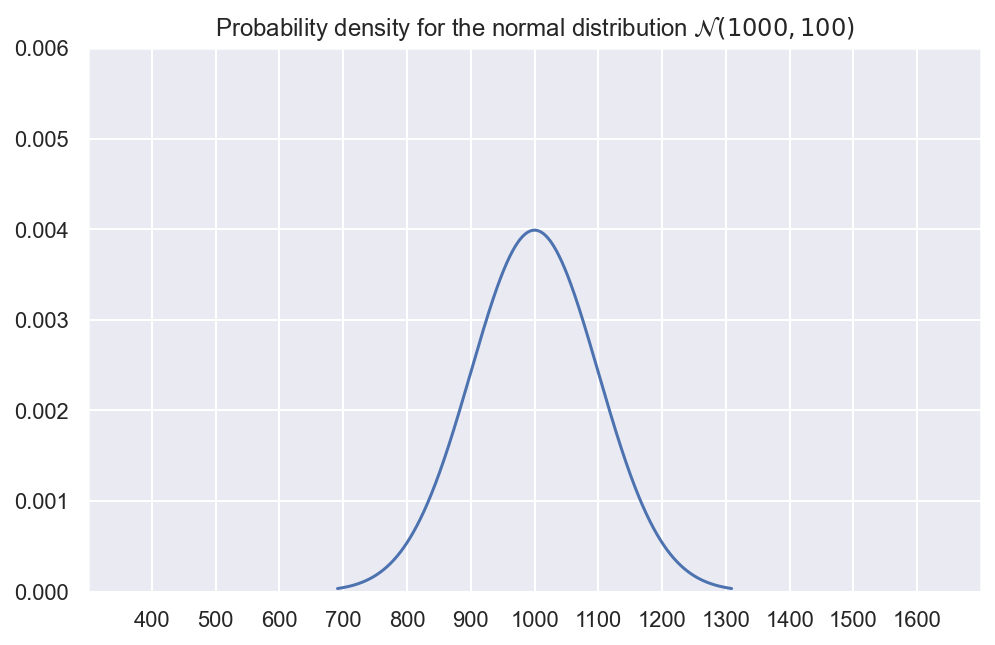

In [38]:
from scipy.stats.distributions import norm

# 1. choose the parameters:
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?

# 2. create a normal random variable
rvN = norm(mean, std)

# 3. plot it's probability density function (pdf)
x = np.linspace(rvN.ppf(0.001), rvN.ppf(0.999), 10000)
y = rvN.pdf(x)
ax = sns.lineplot(x, y)
title = 'Probability density for the normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
ax.set_title(title)
ax.set_xlim(300,1700)
plt.xticks(np.arange(400,1700,100))
_ = ax.set_ylim(0, 0.006)

### Example probability calculation

What is the probability of observing a value between 800 and 900.

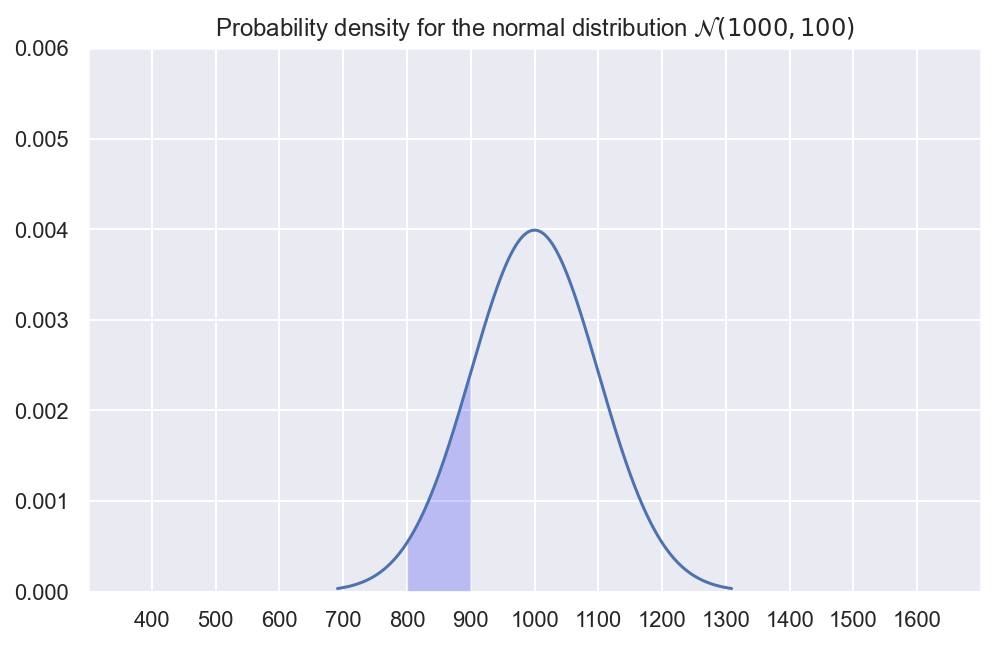

In [39]:
# highlight the area under the curve 
mask = (x > 800) & (x < 900)
_ = ax.fill_between(x[mask], y1=y[mask], alpha=0.2, facecolor='blue')
ax.figure

In [40]:
from scipy import integrate

# Pr(800 < X < 900) = integral of f_X between 800 and 900
integrate.quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

In [41]:
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as plt

def calc_prob_and_plot(rv, a, b, xlims=None):
    """
    Calculate the probability random variable `rv` falls between a and b,
    and plot the area-under-the-curve visualization ofr this calculation.
    """

    # 1. calculate Pr(a<X<b) == integral of rv.pdf between x=a and x=b
    p = integrate.quad(rv.pdf, a, b)[0]

    # 2. plot the probability density function (pdf)
    if xlims:
        xmin, xmax = xlims
    else:
        xmin, xmax = rv.ppf(0.001), rv.ppf(0.999)
    x = np.linspace(xmin, xmax, 10000)
    pX = rv.pdf(x)
    ax = sns.lineplot(x, pX)
    title = 'Probability density for the random variable ' + rv.dist.name + str(rv.args) \
             + ' between ' + str(a) + ' and ' + str(b)
    ax.set_title(title)

    # 3. highlight the area under pX between x=a and x=b
    mask = (x > a) & (x < b)
    ax.fill_between(x[mask], y1=pX[mask], alpha=0.2, facecolor='blue')

    # return prob and figure axes
    return p, ax



In [42]:
calc_prob_and_plot(rv, 600, 1000)

NameError: name 'rv' is not defined

In [ ]:
rv.args

### Cumulative density function (CDF)

The cumulative distribution is the integral (summation) of the probability density function:
$$\large
   F_X(x) = \textrm{Pr}(X \leq x) = \int_{-\infty}^x f_X(t) \, dt
$$


In [ ]:
# Pr(800 < X < 900) = F(900) - F(800)
rv.cdf(900) - rv.cdf(800)

In [ ]:
rv.__class__.mro()

In [ ]:
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pdf_and_cdf(rv, b, a=-np.inf, xlims=None, rv_name="X"):
    """
    Plot side-by-side figure that shows pdf and CDF of random variable `rv`.
    Left plot shows area-under-the-curve visualization until x=b.
    Right plot higlights point at (b, F_X(b)).
    """
    fig, axs = plt.subplots(1, 2)
    ax0, ax1 = axs

    title = 'Probability distributions of the random variable ' \
        + "$" + rv_name + "$" + " ~ " \
        + rv.dist.name + str(rv.args).replace(" ", "")
    # + ' between ' + str(a) + ' and ' + str(b)
    fig.suptitle(title)

    # 1. plot the probability density function (pdf)
    if xlims:
        xmin, xmax = xlims
    else:
        xmin, xmax = rv.ppf(0.001), rv.ppf(0.999)
    x = np.linspace(xmin, xmax, 10000)
    pX = rv.pdf(x)
    sns.lineplot(x, pX, ax=ax0)
    ax0.set_title("Probability density function")

    # highlight the area under pX between x=a and x=b
    mask = (x > a) & (x < b)
    ax0.fill_between(x[mask], y1=pX[mask], alpha=0.2, facecolor='blue')
    ax0.vlines([b], ymin=0, ymax=rv.pdf(b), linestyle="-", alpha=0.5, color="blue")
    ax0.text(b, 0, "$b$", horizontalalignment='center', verticalalignment='top')
    ax0.text(b, rv.pdf(b)/2.5, r"Pr$(\{" + rv_name + r" \leq b \})$    ",
             horizontalalignment='right', verticalalignment='center')

    # 2. plot the CDF
    FX = rv.cdf(x)
    sns.lineplot(x, FX, ax=ax1)
    ax1.set_title("Cumulative distribution function")

    # highlight the point x=b
    ax1.vlines([b], ymin=0, ymax=rv.cdf(b), linestyle="-", color="blue")
    ax1.text(b, 0, "$b$", horizontalalignment='center', verticalalignment='top')
    ax1.text(b, rv.cdf(b), '$(b, F_{' + rv_name + '}(b))$',
             horizontalalignment='right', verticalalignment='bottom')

    # return figure and axes
    return fig, axs


In [ ]:
filename = "figures/uniform_pdf_and_CDF_until_b.pdf"

from scipy.stats.distributions import uniform
rvU = uniform(0, 1)

with plt.rc_context({"figure.figsize":(10,5)}):
    fig, axs = plot_pdf_and_cdf(rvU, 0.7, rv_name="U")
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [ ]:
filename = "figures/normal_pdf_and_CDF_until_b.pdf"

from scipy.stats.distributions import norm
mean = 1000
std = 100
rvN = norm(mean, std)

with plt.rc_context({"figure.figsize":(10,5)}):
    fig, axs = plot_pdf_and_cdf(rvN, 1100, rv_name="N")
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### The inverse-CDF function

In [ ]:
rv.ppf(0.6)

In [ ]:
rv.cdf(1025.33471031358)

## Discussion

### Bulk of the distribution

How much of the total probability "weight" lies within two standard deviations of the mean?

$$
\textrm{Pr}(\mu - 2\sigma \leq X \leq \mu + 2\sigma) \ = \ ?
$$

In [ ]:
mu = rv.mean()    # mean of the random variable
sigma = rv.std()  # standard deviaiton of the random variable
n = 2             # number of standard deviations around the mean

# highlight the selected area around the mean
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 10000)
y = rv.pdf(x)
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]

# values of x in the interval  𝜇 ± 2𝜎 = [𝜇-2𝜎, 𝜇+2𝜎]
mask = (x > mu-n*sigma) & (x < mu+n*sigma)
ax.fill_between(x[mask], y1=y[mask], alpha=0.3, facecolor='blue')


# calculate the probability of Pr{𝜇-2𝜎 < x < 𝜇+2𝜎}
sum(y[mask])/sum(y)

### Tails of the distribution

We're often interested in tail ends of the distribution, which contain the unlikely events. For example, the two-sigma tail ends of the distribution contain less than 5% of the weight.

In [ ]:
n = 2

# highlight the tails of the distribution
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]
mask_l = x < mu - n*sigma
mask_u = x > mu + n*sigma
ax.fill_between(x[mask_l], y1=y[mask_l], alpha=0.3, facecolor='red')
ax.fill_between(x[mask_u], y1=y[mask_u], alpha=0.3, facecolor='red')

# calculate the probability of Pr{x < 𝜇-n𝜎  OR  x > 𝜇+n𝜎}
tail_prob = (sum(y[mask_l]) + sum(y[mask_u]) )/sum(y)

print("Probability of observing value x <",
      round(mu-n*sigma,2), "or x >", round(mu+n*sigma,2),
      "is", round(tail_prob,4))

The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $n=2$ standard deviations away from the mean (more precisely, we should use $n = 1.96$ to get exactly 5%).

We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.

## CUT MATERIAL

In [63]:
# uniform distribution U(0,1)
fU = 1

simplify( integrate(fU, (x,a,b)) )

-a + b

In [61]:
Integral(fU, x)

Integral(1/(-a + b), x)

In [62]:
Integral(fU, x).doit()

x/(-a + b)